In [1]:
from scipy.misc import imread
from sklearn.externals import joblib

import random as rand
import numpy as np 
import cv2
import glob
import time

import matplotlib.pyplot as plt
%matplotlib inline

from helpers import convert, show_images, put_boxes
from featuresourcer import FeatureSourcer
from binaryclassifier import BinaryClassifier
from slider import Slider

import warnings
warnings.filterwarnings('ignore')

In [2]:
svc = joblib.load('models/svc2.pkl')
scaler = joblib.load('models/scaler2.pkl')

sourcer_params = {
    'bounding_box_size': 128,
    'cells_per_block': 2,
    'color_model': 'hsv',
    'number_of_orientations': 12,
    'pixels_per_cell': 16
}

cls = BinaryClassifier(svc, scaler)
src = FeatureSourcer(sourcer_params)
slider = Slider(sourcer=src, classifier=cls, increment=8)

In [3]:
def generate_wp(frame, nb_div):
    wp = []
    height = frame.shape[0]
    for i in range(nb_div):
        wp.append(height//nb_div * i)
    return wp

def generate_ws(frame, nb_div):
    total_size = min(frame.shape[0], frame.shape[1])
    ws = []
    for i in range(1, nb_div + 1):
        ws.append(total_size//nb_div * i)
    return ws

In [4]:
def bounding_boxes_test(this_frame, nb_div):
    
    boxed_images = []
    #strips = []

    window_position = []
    window_size = []

    for pos in generate_wp(this_frame, nb_div):
        for size in generate_ws(this_frame, nb_div):
            if pos + size < this_frame.shape[0]:
                window_position.append(pos)
                window_size.append(size)
    
    for ws, wp in zip(window_size, window_position):
        bounding_boxes = slider.locate(frame=this_frame, window_size=ws, window_position=wp)
        #bounding_boxes = slider.locate(frame=this_frame, nb_div=5)
        img = put_boxes(this_frame, bounding_boxes)
        if len(bounding_boxes):
            boxed_images.append(img)
        #strips.append(slider.strip())

    #show_images(strips, per_row = len(strips), per_col = 1, W = 15, H = 3)
    show_images(boxed_images, per_row = len(boxed_images), per_col = 1, W = 15, H = 3)

In [5]:
frame1 = imread("datasets/full/other/Butterfly/original.jpeg?1532741436.jpg")
frame2 = imread("datasets/full/other/Bee/bbabfdf4-3be0-4210-bd01-8c6f3b16d002_image.jpg")
frame3 = imread("datasets/full/other/Mosquito/248aad4e-e34c-4996-ab46-b28c873232e1.jpg")
frame4 = imread("datasets/full/other/Fly/8820c3a0-e1a5-4dd4-a4d7-3b2855f91875_image.jpg")
frame5 = imread("datasets/full/other/Fly/58418.jpg")
frame6 = imread("datasets/full/other/Mosquito/385f2d78-7de5-4cbc-8226-c09a9ca9aa1f.jpg")

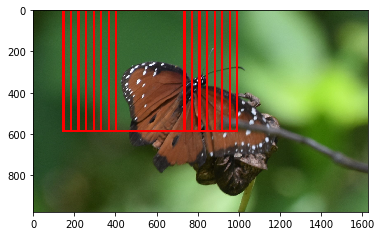

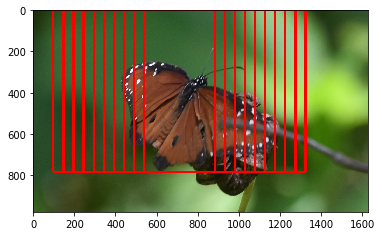

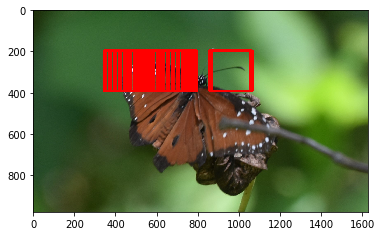

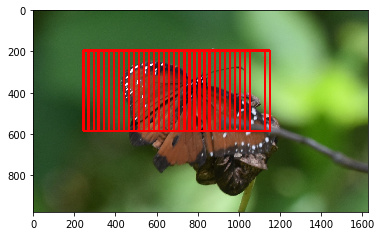

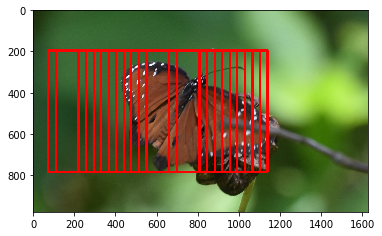

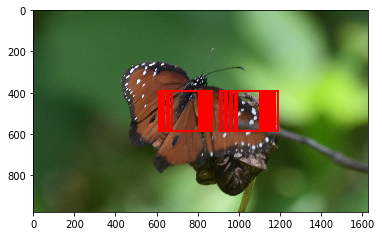

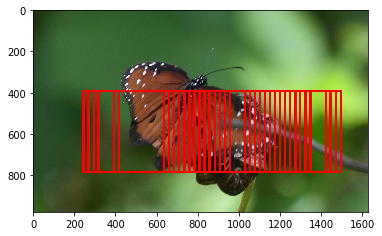

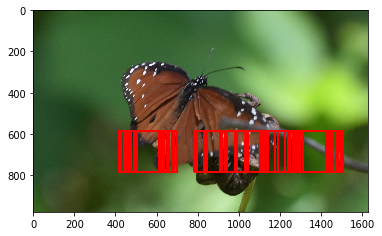

In [6]:
bounding_boxes_test(frame1, 5)

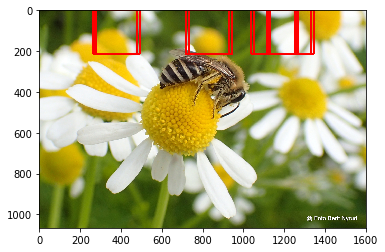

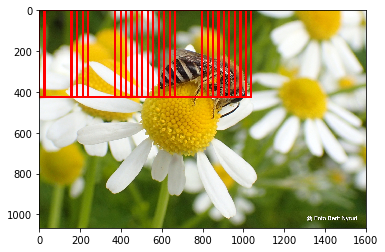

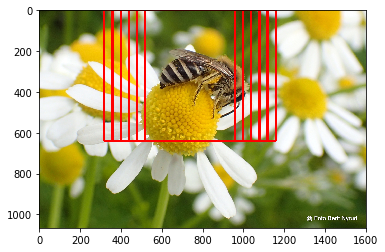

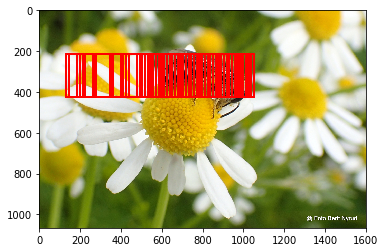

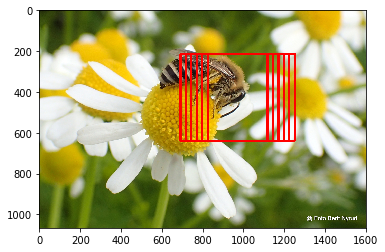

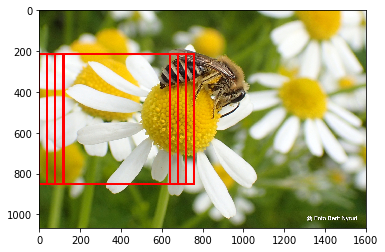

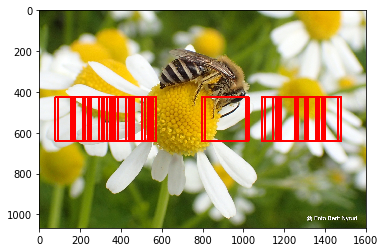

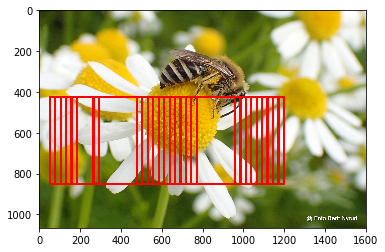

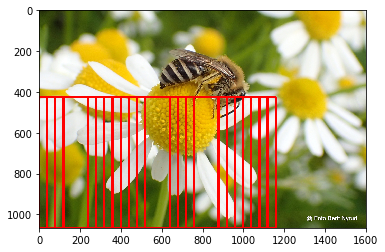

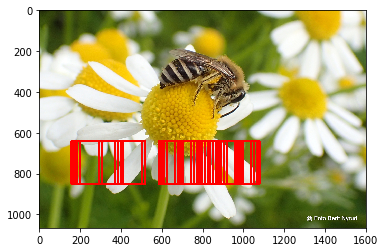

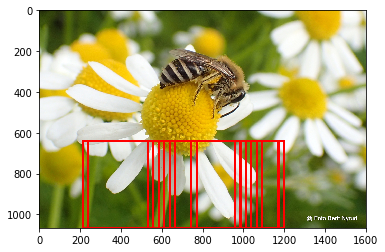

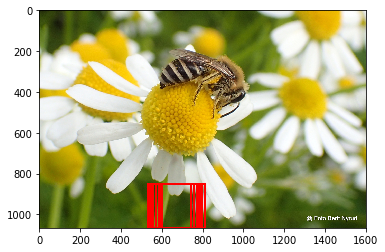

In [7]:
bounding_boxes_test(frame2, 5)

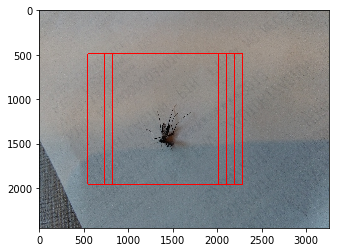

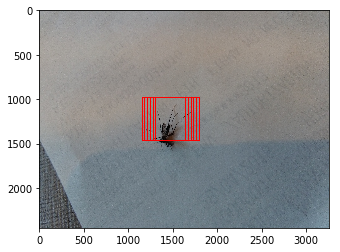

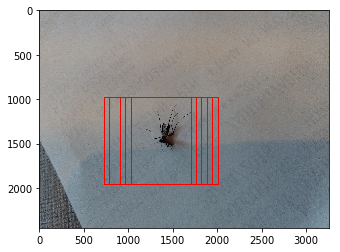

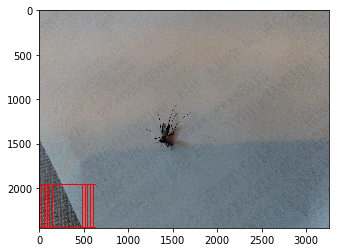

In [8]:
bounding_boxes_test(frame3, 5)

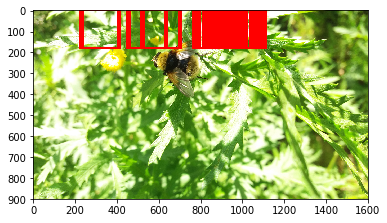

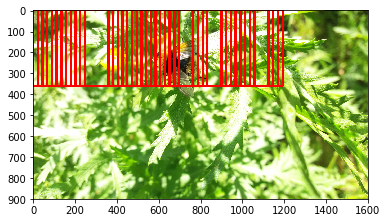

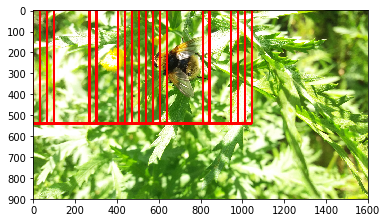

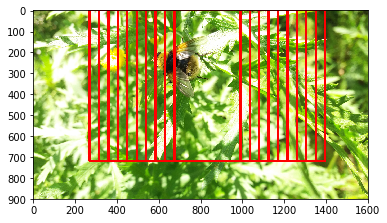

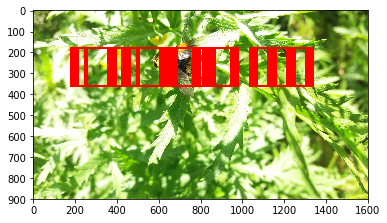

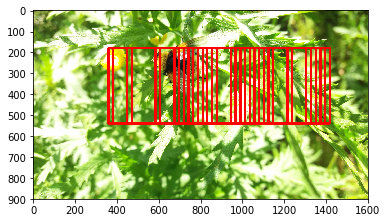

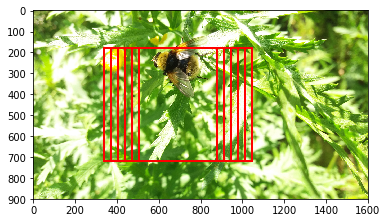

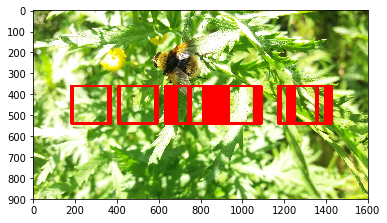

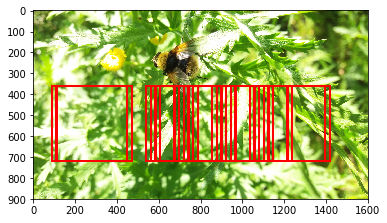

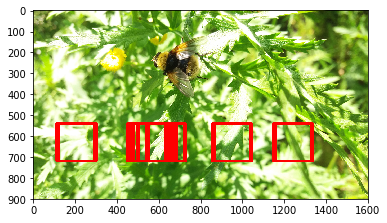

In [9]:
bounding_boxes_test(frame4, 5)

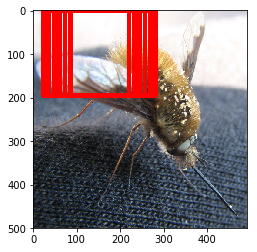

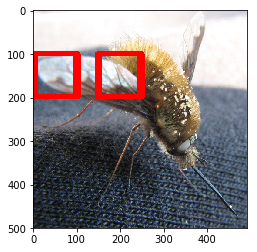

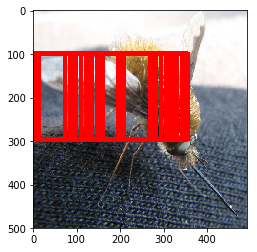

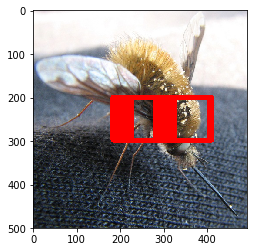

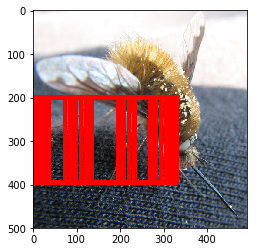

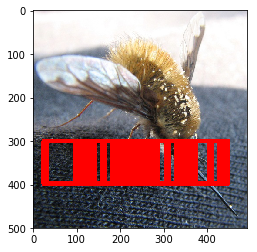

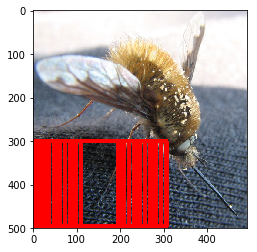

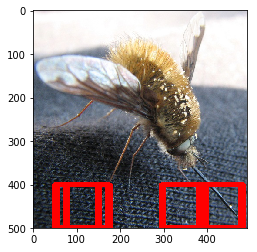

In [10]:
bounding_boxes_test(frame5, 5)

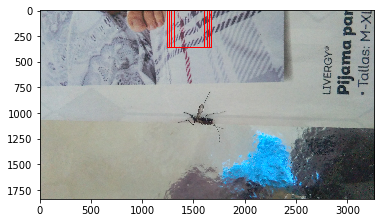

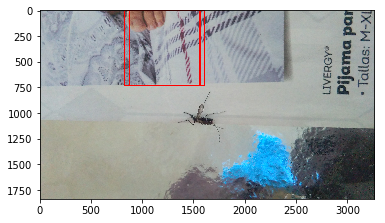

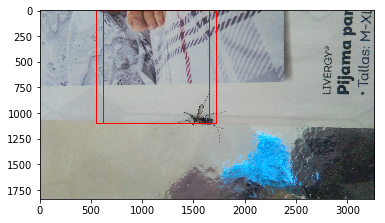

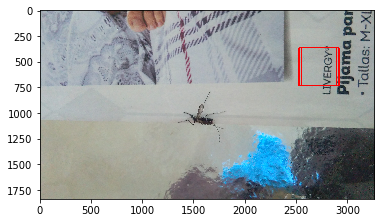

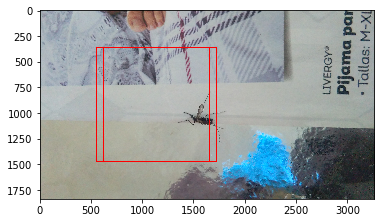

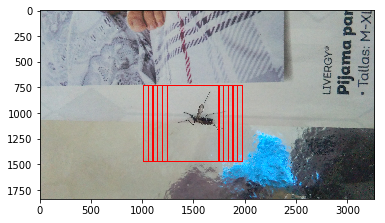

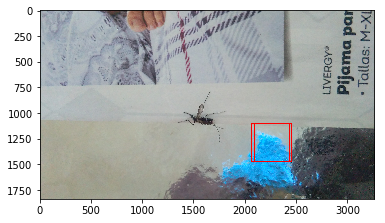

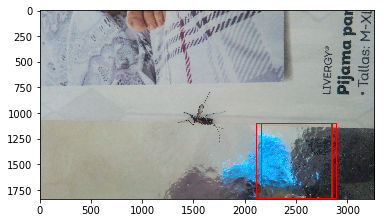

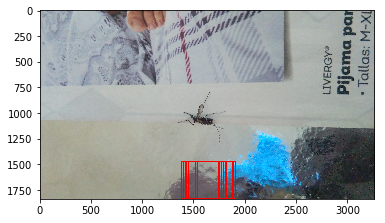

In [11]:
bounding_boxes_test(frame6, 5)